In [7]:
from PIL import Image, ImageDraw, ImageFont
import random
import os
from tqdm import tqdm
from IPython.display import display


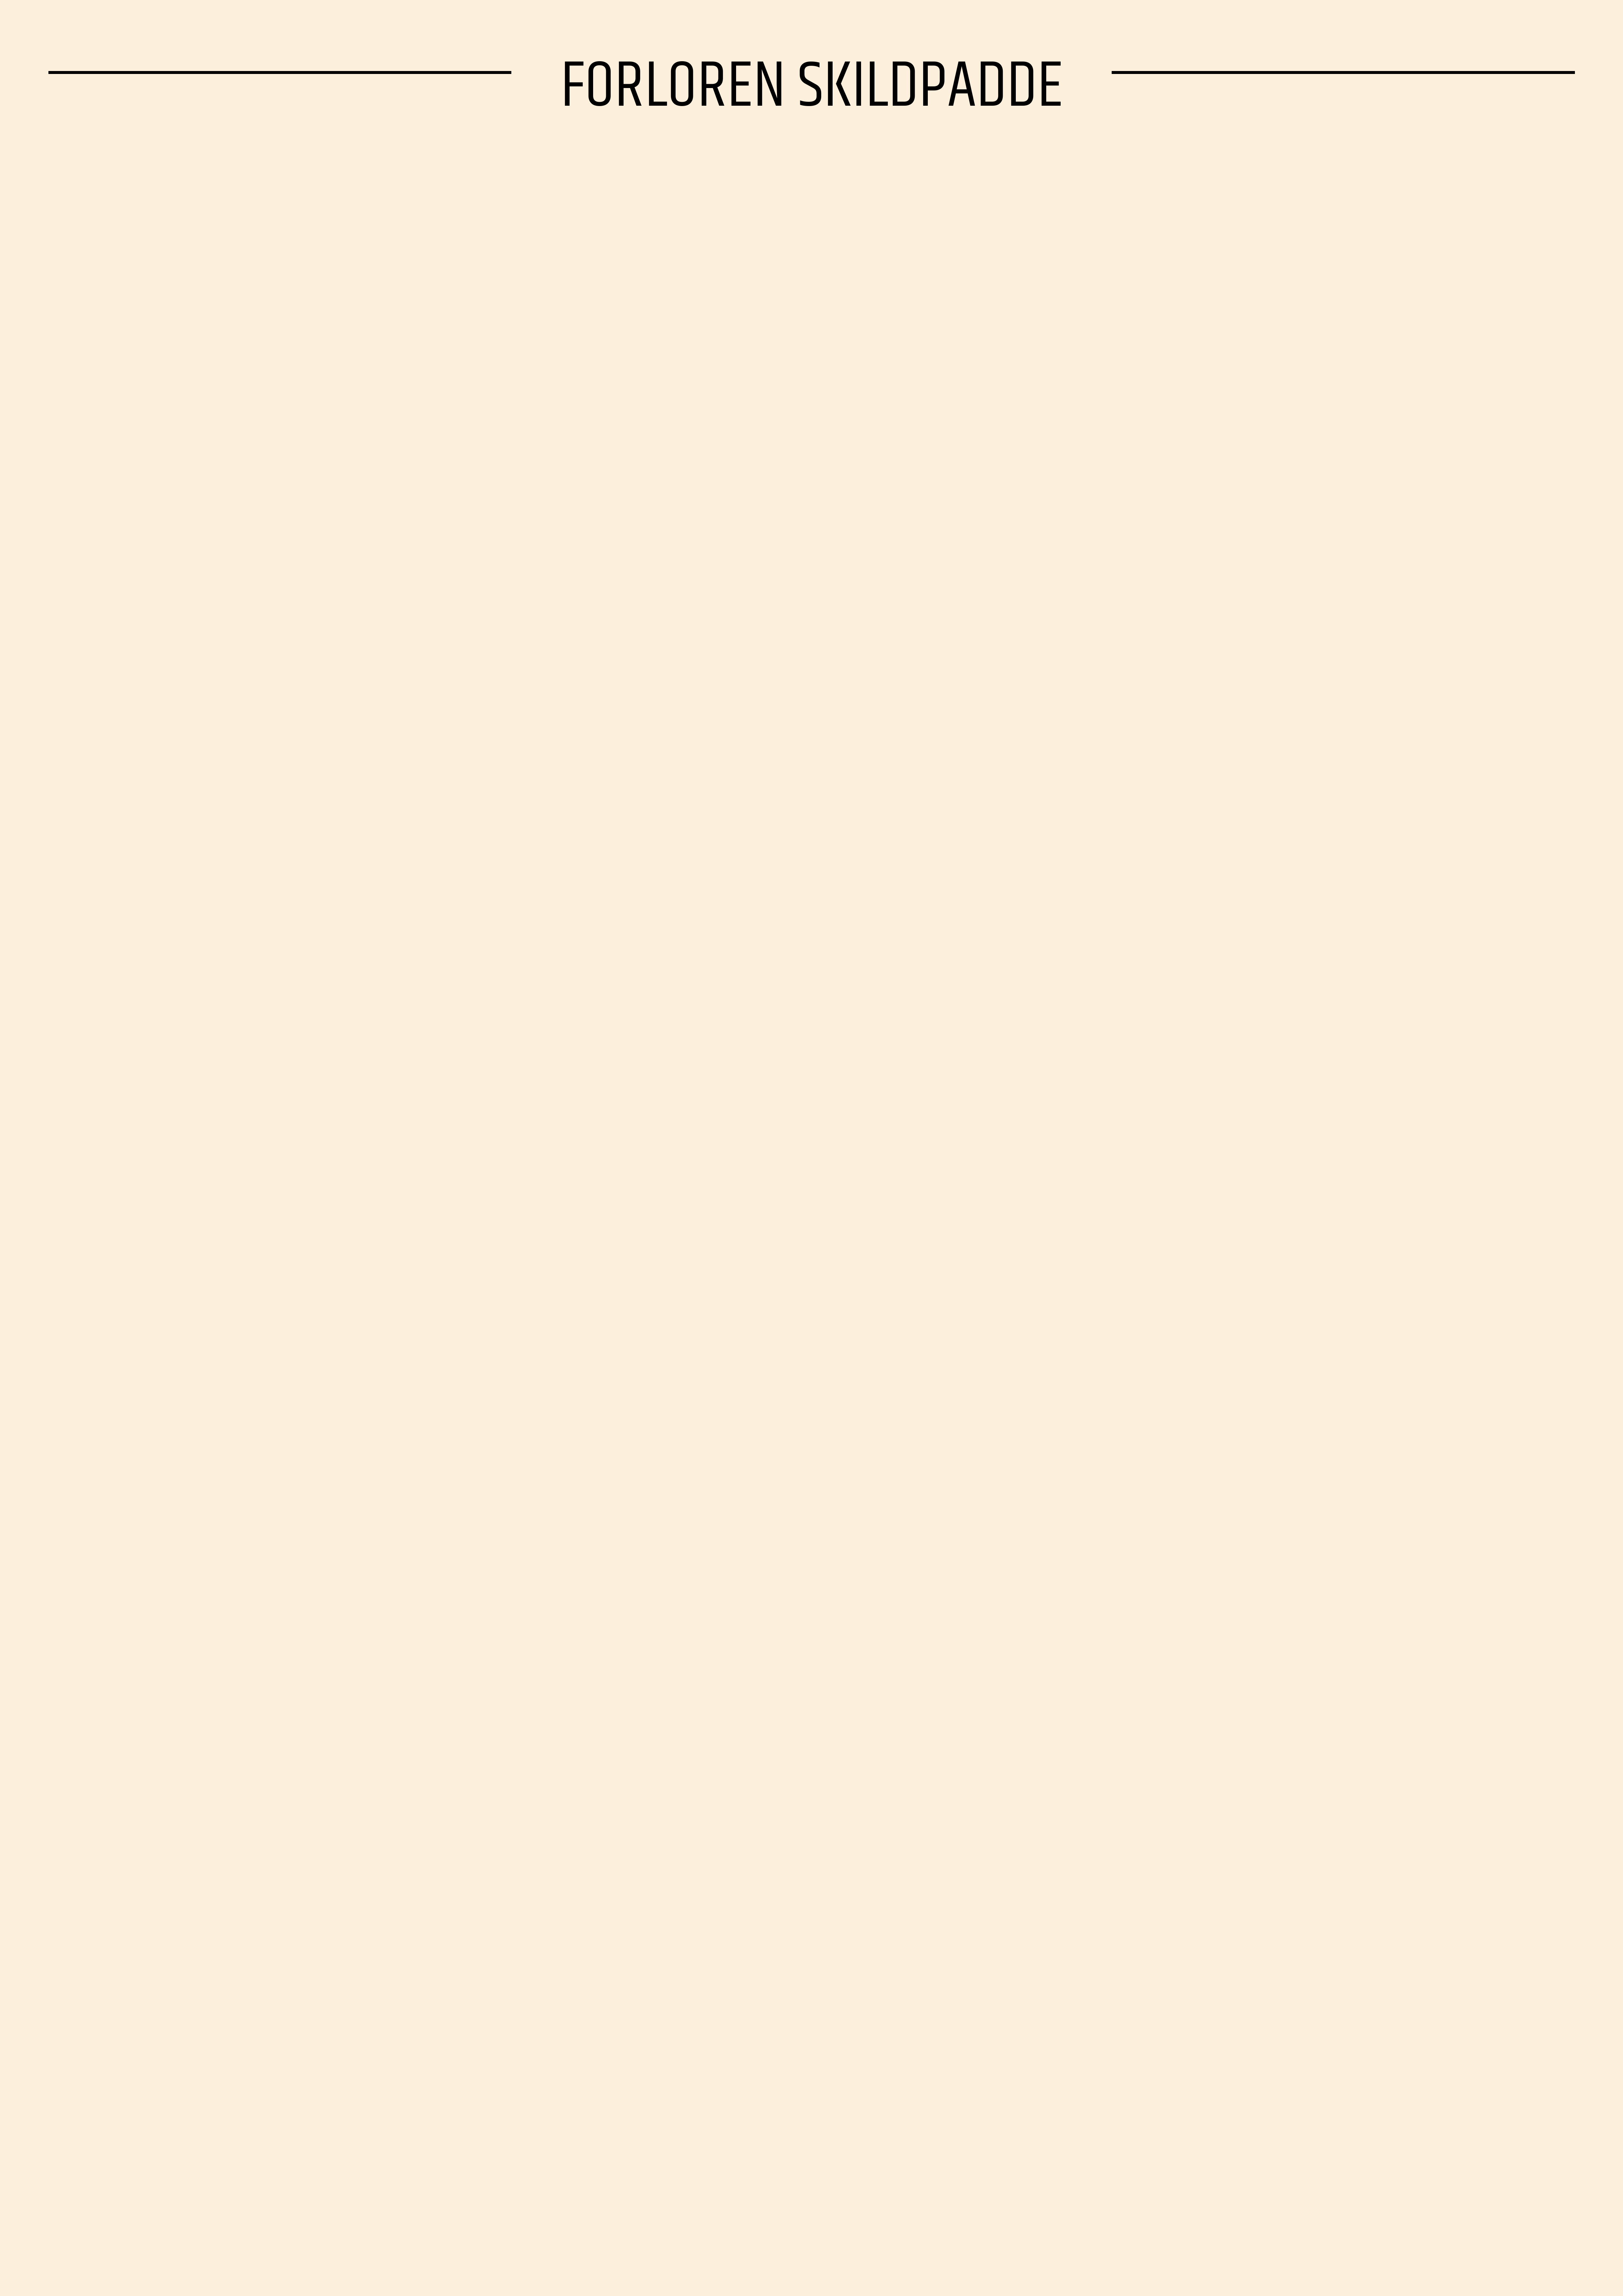

In [8]:
width = 4961
height = 7016
offset = int(width * 0.03)
top_margin = offset * 3
# (left, right, top, bottom)
margins = (offset, offset, top_margin, offset)
image = Image.new('RGBA', (width, height), (0,0,0,0))
# draw a rectangle with the given margin 
draw = ImageDraw.Draw(image)

# draw.rectangle([margins[0], margins[2], width - margins[1], height - margins[3]], outline="black", width=10)
draw.rectangle([(0,0),image.size], fill = '#fcf0dc' )

fonts = ['PlayfairDisplay-Bold.ttf', 'BaskervvilleSC-Bold.ttf', 'JosefinSans-Regular.ttf', 'Khand-Regular.ttf', 'AmaticSC-Bold.ttf']

font = ImageFont.truetype(f"fonts/{fonts[3]}", size=200)  # Make sure 'arial.ttf' is available or specify the path to another font file
text = "FORLOREN SKILDPADDE"
text_bbox = draw.textbbox((0, 0), text, font=font)
text_width = text_bbox[2] - text_bbox[0]
text_height = text_bbox[3] - text_bbox[1]

# text_width, text_height = draw.textsize(text, font=font)

# Center the text
text_position = ((width - text_width) / 2, (top_margin - text_height) / 2 - 30)

draw.text((text_position[0], text_position[1] - 10), text, fill='black', font=font)

# Draw the two black lines at the top
draw.rectangle((offset, text_position[1] + text_height/2 + 25, text_position[0] - 150, text_position[1] + text_height/2 + 8 + 25), fill='black')
draw.rectangle((text_position[0] + text_width + 150, text_position[1] + text_height/2 + 25, width-offset, text_position[1] + text_height/2 + 8 + 25), fill='black')

# Check that everything looks OK
display(image)

In [9]:
def count_files_in_directory(directory_path):
    with os.scandir(directory_path) as entries:
        return sum(1 for entry in entries if entry.is_file())
    
image_dir = "all_turtles"
n_images = count_files_in_directory(image_dir)


In [10]:

def overlaps(rect1, rect2):
    x1, y1, w1, h1 = rect1
    x2, y2, w2, h2 = rect2
    return not (x1 + w1 <= x2 or x2 + w2 <= x1 or y1 + h1 <= y2 or y2 + h2 <= y1)

def generate_random_rectangles(num_rects, canvas_width, canvas_height):
    rectangles = []

    for _ in tqdm(range(num_rects)):
        while True:            
            scaling = random.uniform(0.25, 0.6) * 1.35
            width = int(534 * scaling)
            x = random.randint(0, canvas_width - width)
            y = random.randint(0, canvas_height - width)
            
            new_rect = (x, y, width, width)
            if not any(overlaps(new_rect, rect) for rect in rectangles):
                rectangles.append(new_rect)
                break
    
    return rectangles


rectangles = generate_random_rectangles(n_images, width - offset *2, height - offset - top_margin)

100%|██████████| 290/290 [00:02<00:00, 117.24it/s] 


In [11]:
def generate_unique_name(directory, file_name):
    base_name, extension = os.path.splitext(file_name)
    extension = extension.lstrip('.')  # Remove the leading dot from the extension
    count = 1
    while True:
        new_name = f"{base_name}_{count}.{extension}"
        if not os.path.exists(os.path.join(directory, new_name)):
            return new_name
        count += 1

    
def save_image(img, name):
    unique = generate_unique_name('collages/', name)
    img.save(f"collages/{unique}")



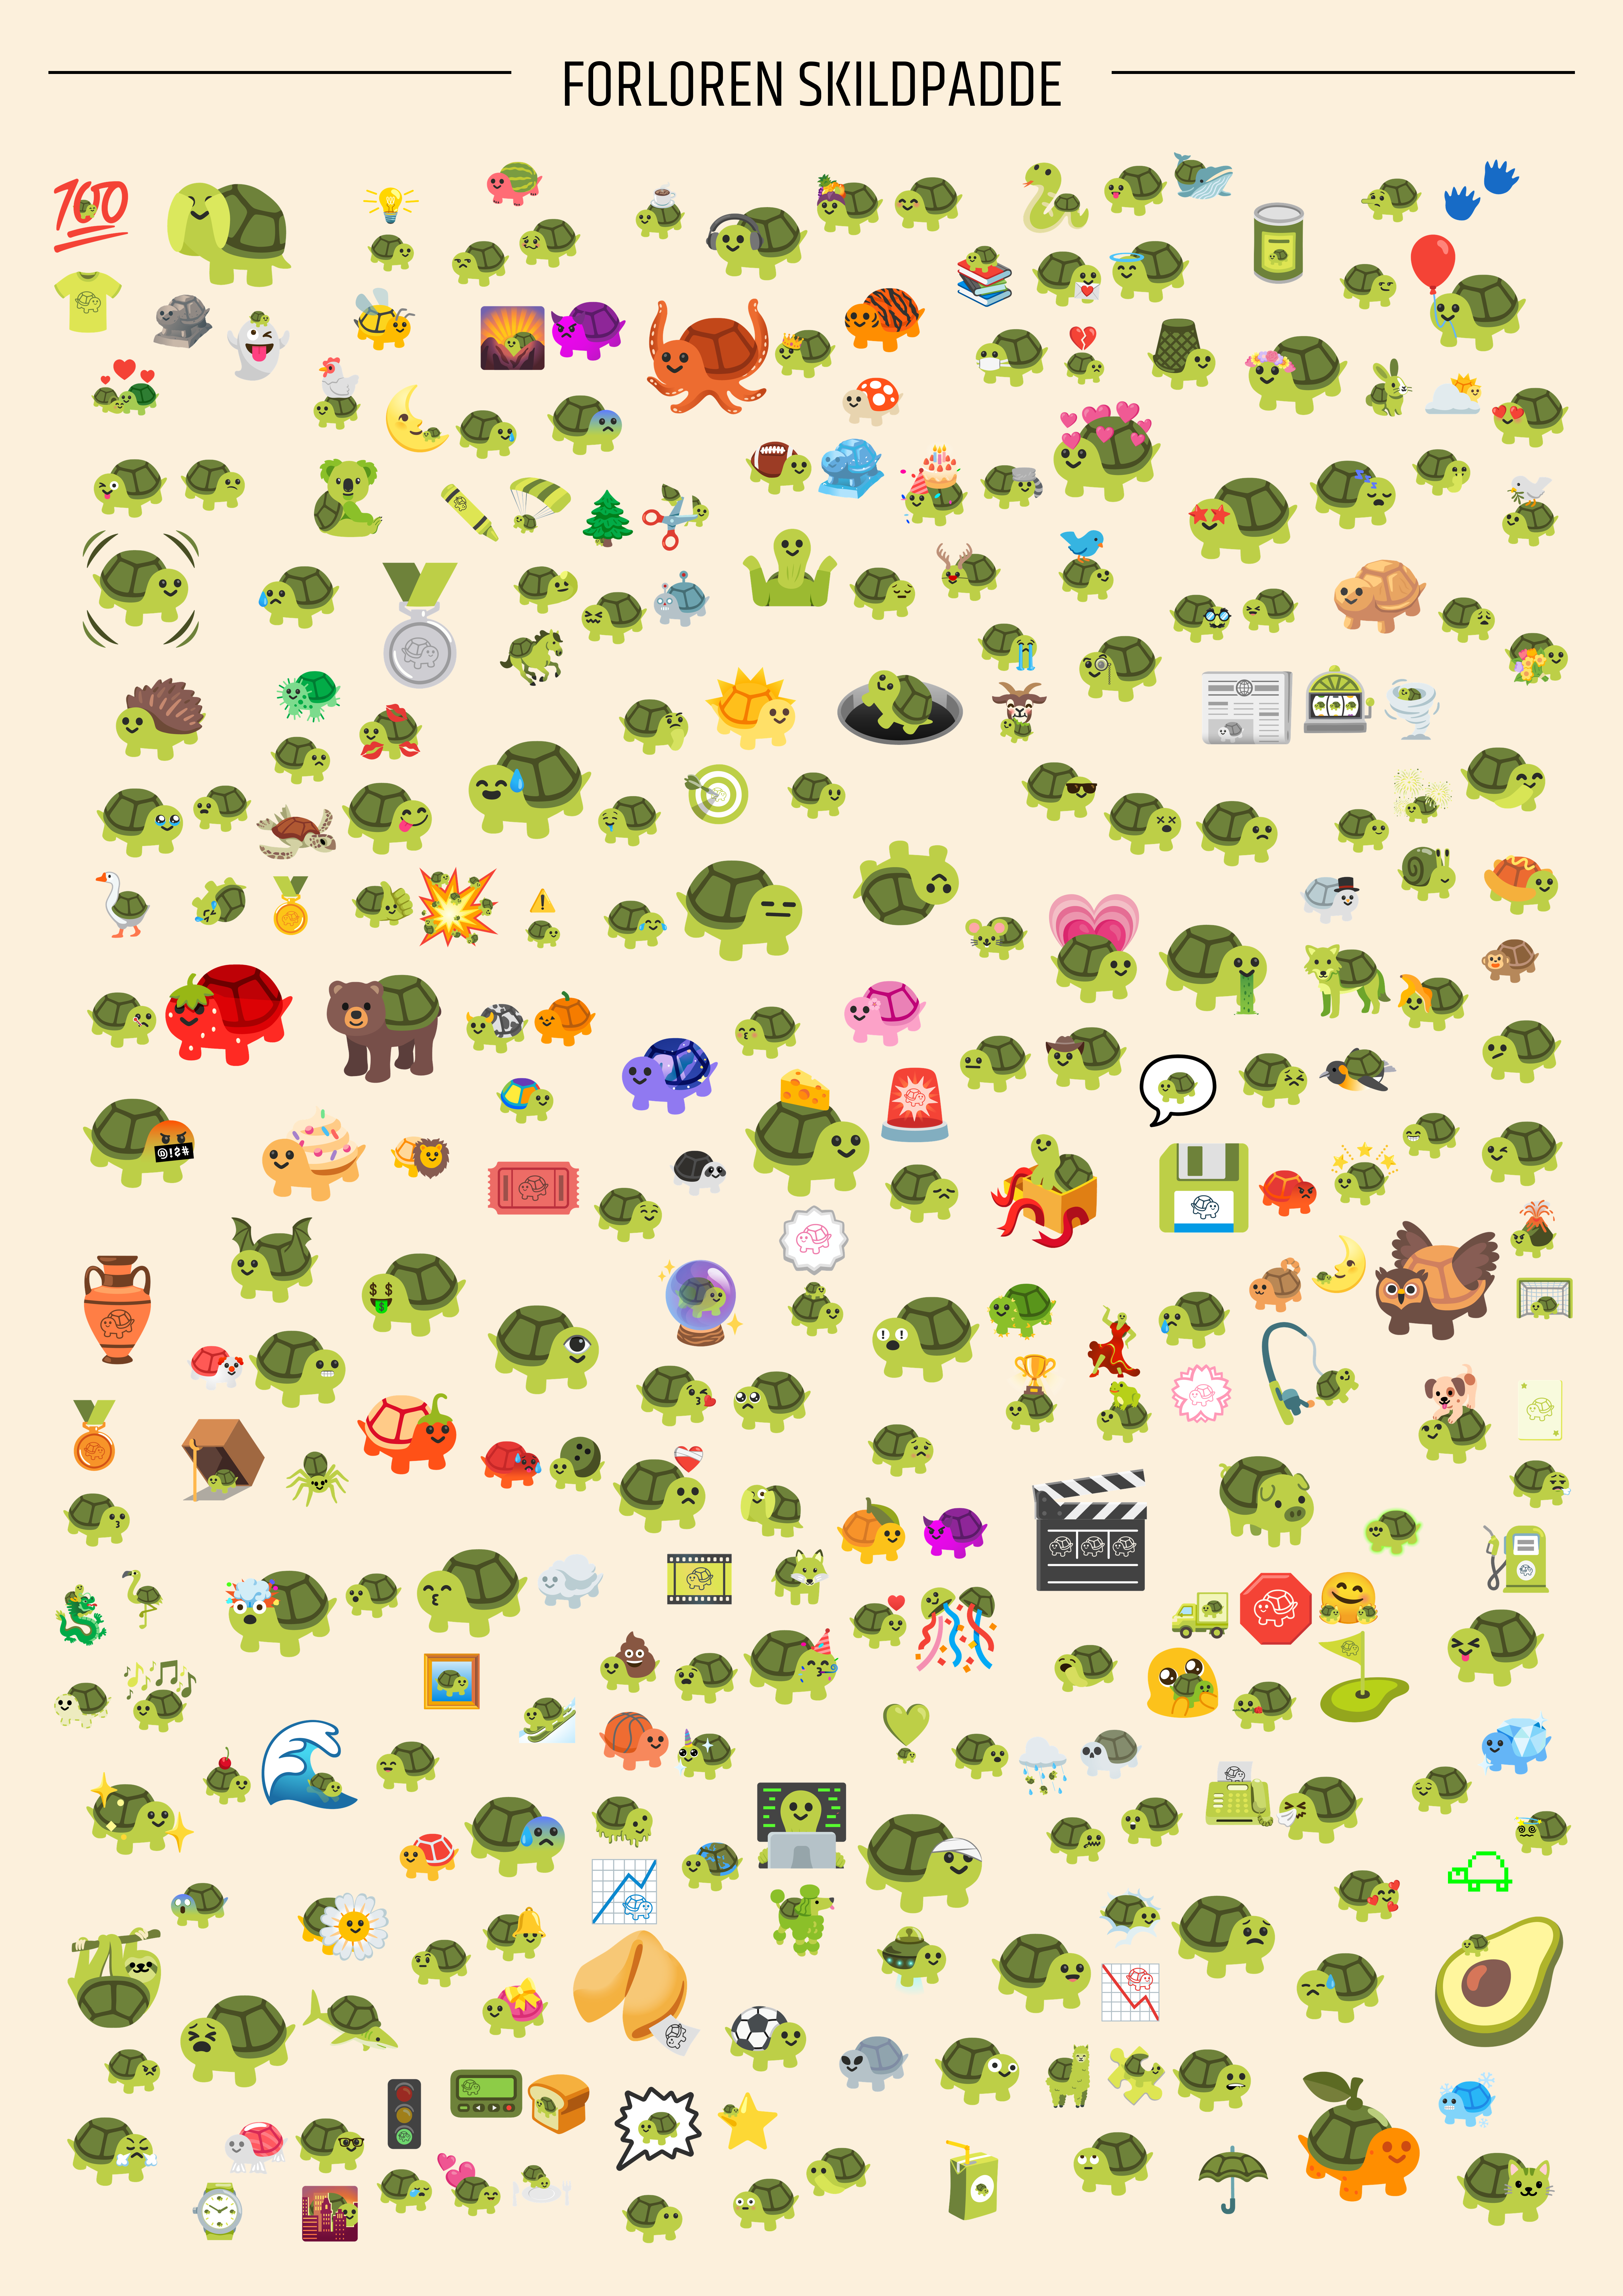

In [12]:


images = [Image.open(f'{image_dir}/{x}').convert("RGBA") for x in os.listdir(image_dir)]
random.shuffle(images)
for rect, img in zip(rectangles, images):
    x, y, w, h = rect
    img = img.resize((w, h))
    # randomly flip the image 
    if random.random() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
    image.paste(img, (x + offset, y + top_margin), img)

save_image(image, 'turtle_collage.png')
display(image)